In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
from ultralytics import YOLO
import os
# img_dir = Path("dataset/images/train")

# img_path = list(img_dir.glob("*.jpg"))

# plt.figure(figsize=(10, 8))

# for i, path in enumerate(img_path[:6]):
#     img = Image.open(path)
#     plt.subplot(2, 3, i + 1)
#     plt.imshow(img)
#     plt.title(path.name)
#     plt.axis("off")


In [2]:
model = YOLO("runs/detect/train3/weights/best.pt")
eval_img_dir = Path("images")
eval_img_path = list(eval_img_dir.glob("*.jpg"))
result_dir = Path("results")
result_dir.mkdir(exist_ok=True)
crop_dir = result_dir / "crops"
crop_dir.mkdir(exist_ok=True)


In [ ]:
for img in eval_img_path:
    img_name_without_ext = img.stem
    results = model.predict(img,save = True,project=result_dir,exist_ok=True)[0]
    boxes = results.boxes
    image = cv2.imread(img)
    #获取图片长宽便于判断
    h, w = image.shape[:2]
    if len(boxes) != 6:
        print(f"⚠️ Warning: {img} - Detected {len(boxes)} boxes (expecting 6)")
        continue
    # Extract XYXY and sort by horizontal (left to right) position
    xyxy_list = [box.xyxy[0].cpu().numpy() for box in boxes]
    
    # Decide sorting axis
    if w >= h:
        # Landscape → sort left-to-right (x1)
        xyxy_sorted = sorted(xyxy_list, key=lambda b: b[0])
    else:
        # Portrait → sort top-to-bottom (y1)
        xyxy_sorted = sorted(xyxy_list, key=lambda b: b[1])

    # Crop and save
    for idx, box in enumerate(xyxy_sorted, start=1):
        x1, y1, x2, y2 = map(int, box)
        crop = image[y1:y2, x1:x2]
        save_path =  crop_dir / f"{img_name_without_ext}_{idx}.jpg"
        cv2.imwrite(save_path, crop)

    print(f"✅ Processed: {img}")

print("🎉 All crops saved to:", crop_dir)





image 1/1 /home/frxu/repo/wabco/images/8331751694019_.pic_hd.jpg: 640x480 6 class_0s, 2.7ms
Speed: 10.3ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to results/predict
✅ Processed: images/8331751694019_.pic_hd.jpg

image 1/1 /home/frxu/repo/wabco/images/8321751694007_.pic_hd.jpg: 640x480 6 class_0s, 2.7ms
Speed: 1.4ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to results/predict
✅ Processed: images/8321751694007_.pic_hd.jpg

image 1/1 /home/frxu/repo/wabco/images/8311751694002_.pic_hd.jpg: 640x480 6 class_0s, 2.7ms
Speed: 1.6ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to results/predict
✅ Processed: images/8311751694002_.pic_hd.jpg
🎉 All crops saved to: results/crops


In [17]:
img = eval_img_path[0]
img_name_without_ext = img.stem
results = model.predict(img, save=True, project=result_dir, exist_ok=True)[0]
boxes = results.boxes
image = cv2.imread(img)
#获取图片长宽便于判断
h, w = image.shape[:2]
xyxy_list = [box.xyxy[0].cpu().numpy() for box in boxes]


image 1/1 /home/frxu/repo/wabco/images/8331751694019_.pic_hd.jpg: 640x480 6 class_0s, 2.7ms
Speed: 10.0ms preprocess, 2.7ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to results/predict


In [18]:
image.shape, xyxy_list

((5712, 4284, 3),
 [array([     1946.6,      1305.1,      2189.8,        1554], dtype=float32),
  array([     1959.1,      1868.8,      2205.2,      2123.6], dtype=float32),
  array([     1973.8,      2437.8,      2204.4,      2665.1], dtype=float32),
  array([     1953.5,      4107.7,      2190.1,      4362.1], dtype=float32),
  array([     1961.3,      2988.1,      2204.9,      3224.3], dtype=float32),
  array([     1947.5,        3548,      2193.4,      3792.6], dtype=float32)])

In [20]:
xyxy_sorted = sorted(xyxy_list, key=lambda b: b[1])
xyxy_sorted

[array([     1946.6,      1305.1,      2189.8,        1554], dtype=float32),
 array([     1959.1,      1868.8,      2205.2,      2123.6], dtype=float32),
 array([     1973.8,      2437.8,      2204.4,      2665.1], dtype=float32),
 array([     1961.3,      2988.1,      2204.9,      3224.3], dtype=float32),
 array([     1947.5,        3548,      2193.4,      3792.6], dtype=float32),
 array([     1953.5,      4107.7,      2190.1,      4362.1], dtype=float32)]

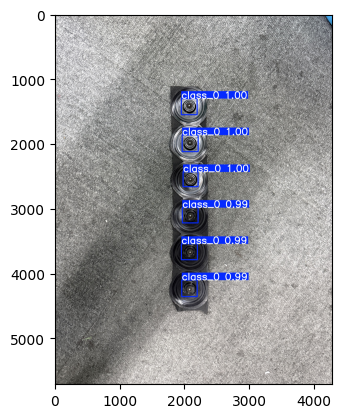

In [22]:
a = Path("results/predict/8331751694019_.pic_hd.jpg")
b = Image.open(a)
plt.imshow(b)

In [ ]:
for idx, box in enumerate(xyxy_sorted, start=1):
    x1, y1, x2, y2 = map(int, box)
    crop = image[y1:y2, x1:x2]
    save_path =  crop_dir / f"{img_name_without_ext}_{idx}.jpg"
    cv2.imwrite(save_path, crop)

In [30]:
x1, y1, x2, y2 = map(int, xyxy_sorted[0])
crop = image[y1:y2, x1:x2]
print(crop.shape, crop)
save_path = crop_dir / f"{img_name_without_ext}_{idx}.jpg"
save_path

(248, 243, 3) [[[154 146 146]
  [140 132 132]
  [102  94  94]
  ...
  [204 201 203]
  [212 209 211]
  [218 217 221]]

 [[146 138 138]
  [120 112 112]
  [ 83  75  75]
  ...
  [206 201 203]
  [211 208 210]
  [216 215 219]]

 [[124 116 116]
  [ 92  84  84]
  [ 69  61  61]
  ...
  [206 201 203]
  [215 210 212]
  [216 212 217]]

 ...

 [[ 93  88  85]
  [100  95  92]
  [110 105 102]
  ...
  [152 148 143]
  [143 139 134]
  [139 135 130]]

 [[ 92  87  84]
  [ 91  86  83]
  [ 99  94  91]
  ...
  [146 142 137]
  [131 127 122]
  [123 119 114]]

 [[103  98  95]
  [ 92  87  84]
  [ 93  88  85]
  ...
  [141 137 132]
  [126 122 117]
  [124 118 113]]]


PosixPath('results/crops/8331751694019_.pic_hd_6.jpg')

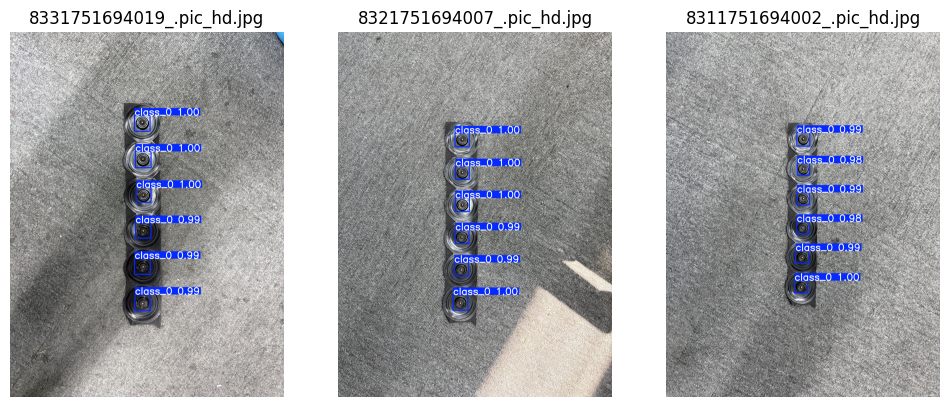

In [47]:
test_img_dir = result_dir / "predict"
test_img_path = list(test_img_dir.glob("*.jpg"))

plt.figure(figsize=(12, 8))

for i, path in enumerate(test_img_path):
    img = Image.open(path)
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(path.name)
    plt.axis("off")

In [ ]:
import time
from detector import ObjectDetector , DefectClassifier
detector = ObjectDetector()
classifier = DefectClassifier()
img_path = "image_20250711_132203.bmp" 
crops = detector.detect_and_crop_images(img_path)
start_time = time.time()
predictions = classifier.classify(crops)
print(f"Number of crops: {len(crops)}")
print(predictions, f"Time taken: {time.time() - start_time:.2f} seconds")
print(next(classifier.model.parameters()).device)



image 1/1 /home/xuliren/repo/wabco/dataset/prod_classifier/NG/image_20250711_132203.bmp: 544x640 1 class_0, 48.0ms
Speed: 6.6ms preprocess, 48.0ms inference, 115.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to dataset/biclassifier_v1/NG_cropped/predict
⚠️ Warning: image_20250711_132203 - Detected 1 boxes (expecting 6)


In [3]:
predictions = [{1: 'NG'}, {2: 'NG'}, {3: 'NG'}, {4: 'NG'}, {5: 'NG'}, {6: 'NG'}]
plc_results = {}
for pred in predictions:
    for idx, label in pred.items():
        plc_results[f"position{idx}"] = label
print(plc_results)

{'position1': 'NG', 'position2': 'NG', 'position3': 'NG', 'position4': 'NG', 'position5': 'NG', 'position6': 'NG'}


In [12]:
for idx, label in predictions[1].items():
    print(f"Position {idx}: {label}")
    

Position 2: NG


In [ ]:
from detector import ObjectDetector
from pathlib import Path
img_folder = Path("dataset/prod_classifier/NG")
detector = ObjectDetector()
for img_path in list(img_folder.glob("*.bmp")):
    print(f"Processing {img_path.name}")
    detector.detect_and_crop_images(img_path.name)

Processing image_20250711_133153.bmp
Processing image_20250711_134759.bmp
Processing image_20250711_134447.bmp
Processing image_20250711_133151.bmp
Processing image_20250711_134402.bmp
Processing image_20250711_134458.bmp
Processing image_20250711_134431.bmp
Processing image_20250711_133554.bmp
Processing image_20250711_134333.bmp
Processing image_20250711_133315.bmp
Processing image_20250711_133708.bmp
Processing image_20250711_134304.bmp
Processing image_20250711_133140.bmp
Processing image_20250711_134442.bmp
Processing image_20250711_134452.bmp
Processing image_20250711_134413.bmp
Processing image_20250711_134516.bmp
Processing image_20250711_134240.bmp
Processing image_20250711_132230.bmp
Processing image_20250711_134338.bmp
Processing image_20250711_133607.bmp
Processing image_20250711_134248.bmp
Processing image_20250711_134423.bmp
Processing image_20250711_133135.bmp
Processing image_20250711_134341.bmp
Processing image_20250711_134312.bmp
Processing image_20250711_133326.bmp
P

In [1]:
from torchvision import datasets

dataset = datasets.ImageFolder("dataset/biclassifier/train", transform=None)
print(dataset.class_to_idx)

{'NG': 0, 'OK': 1}
